### Ultimate Technologies

<b>CASE STUDY</b>

In [1]:
#Python modules
import json

import datetime as dttm

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns

### 1 USER LOGINS: EXPLORATORY DATA ANALYSIS

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. 

Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. 

Please report/illustrate important features of the demand, such as daily cycles. 

If there are data quality issues, please report them.


In [2]:
#load data
filepath01 = 'ultimate_challenge/logins.json'

with open(filepath01, mode='r') as fl01:
    logins_dict_01 = json.load(fl01)
    
df_logins_01 = pd.DataFrame.from_dict(logins_dict_01)
df_logins_01.loc[:,'login_time'] = pd.to_datetime(df_logins_01.loc[:,'login_time'])
df_logins_01.columns = ['login_dttm']

In [3]:
df_logins_01.loc[:,'login_date'] = pd.to_datetime(df_logins_01.loc[:,'login_dttm'].dt.date)
df_logins_01.loc[:,'login_time'] = df_logins_01.loc[:,'login_dttm'].dt.time
df_logins_01.sort_values(by='login_dttm',ascending=True,inplace=True)
df_logins_01.set_index(keys=['login_dttm'],drop=False,inplace=True)

In [4]:
df_logins_01.info()
df_logins_01.head(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:12:16 to 1970-04-13 18:57:38
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_dttm  93142 non-null  datetime64[ns]
 1   login_date  93142 non-null  datetime64[ns]
 2   login_time  93142 non-null  object        
dtypes: datetime64[ns](2), object(1)
memory usage: 2.8+ MB


,login_dttm,login_date,login_time
login_dttm,,,
1970-01-01 20:12:16,1970-01-01 20:12:16,1970-01-01,20:12:16
1970-01-01 20:13:18,1970-01-01 20:13:18,1970-01-01,20:13:18
1970-01-01 20:16:10,1970-01-01 20:16:10,1970-01-01,20:16:10
1970-01-01 20:16:36,1970-01-01 20:16:36,1970-01-01,20:16:36
1970-01-01 20:16:37,1970-01-01 20:16:37,1970-01-01,20:16:37
1970-01-01 20:21:41,1970-01-01 20:21:41,1970-01-01,20:21:41
1970-01-01 20:26:05,1970-01-01 20:26:05,1970-01-01,20:26:05
1970-01-01 20:26:21,1970-01-01 20:26:21,1970-01-01,20:26:21
1970-01-01 20:31:03,1970-01-01 20:31:03,1970-01-01,20:31:03


In [5]:
df_logins_01.tail(10)

,login_dttm,login_date,login_time
login_dttm,,,
1970-04-13 18:40:31,1970-04-13 18:40:31,1970-04-13,18:40:31
1970-04-13 18:40:40,1970-04-13 18:40:40,1970-04-13,18:40:40
1970-04-13 18:43:19,1970-04-13 18:43:19,1970-04-13,18:43:19
1970-04-13 18:43:56,1970-04-13 18:43:56,1970-04-13,18:43:56
1970-04-13 18:46:06,1970-04-13 18:46:06,1970-04-13,18:46:06
1970-04-13 18:48:52,1970-04-13 18:48:52,1970-04-13,18:48:52
1970-04-13 18:50:19,1970-04-13 18:50:19,1970-04-13,18:50:19
1970-04-13 18:54:02,1970-04-13 18:54:02,1970-04-13,18:54:02
1970-04-13 18:54:23,1970-04-13 18:54:23,1970-04-13,18:54:23


In [6]:
df_logins_01.loc[:,'login_dttm'].describe(datetime_is_numeric=True)

count                            93142
mean     1970-02-26 19:09:39.779648279
min                1970-01-01 20:12:16
25%         1970-02-04 10:37:19.750000
50%         1970-03-01 06:33:05.500000
75%         1970-03-22 04:01:10.750000
max                1970-04-13 18:57:38
Name: login_dttm, dtype: object

In [7]:
df_loginct_01 = df_logins_01.loc[:,['login_time']].groupby(pd.Grouper(freq='15Min', offset=0, label='left')).count()
df_loginct_01.columns = ['login_ct']
df_loginct_01.head(10)

,login_ct
login_dttm,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


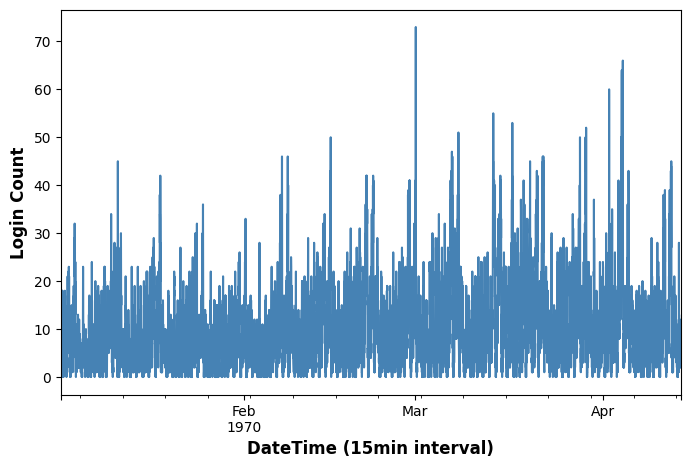

In [8]:
fig01, axes01 = plt.subplots(nrows=1,ncols=1,figsize=(8,5))

df_loginct_01.loc[:,'login_ct'].plot(ax=axes01,color='steelblue')
axes01.set_xlabel('DateTime (15min interval)', fontsize=12.0, fontweight='bold')
axes01.tick_params(axis='x', labelsize=10)
axes01.set_ylabel('Login Count', fontsize=12.0, fontweight='bold') 
axes01.tick_params(axis='y', labelsize=10) 

plt.show()

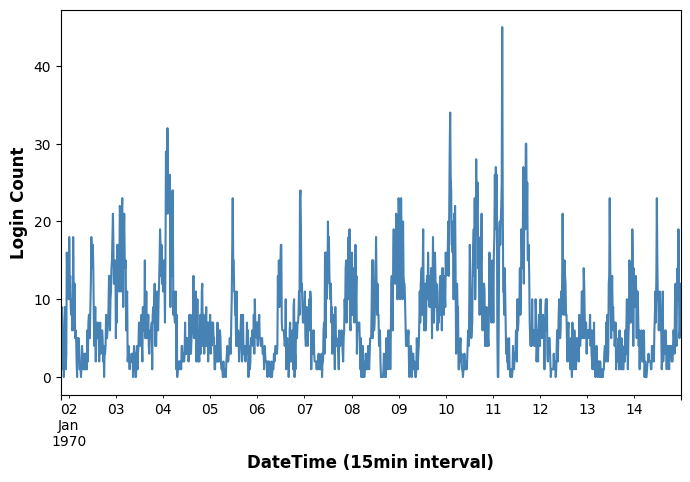

In [9]:
fig02, axes02 = plt.subplots(nrows=1,ncols=1,figsize=(8,5))

df_loginct_01.loc['1970-01-01':'1970-01-14','login_ct'].plot(ax=axes02,color='steelblue')
axes02.set_xlabel('DateTime (15min interval)', fontsize=12.0, fontweight='bold')
axes02.tick_params(axis='x', labelsize=10)
axes02.set_ylabel('Login Count', fontsize=12.0, fontweight='bold') 
axes02.tick_params(axis='y', labelsize=10) 

plt.show()

In [10]:
#weekday, hour_of_day,  categories
df_loginct_01.loc[:,'weekday'] = df_loginct_01.index.weekday
df_loginct_01.loc[:,'hour_of_day'] = df_loginct_01.index.hour

In [11]:
df_loginct_wd_01 = df_loginct_01.loc[:,['weekday','login_ct']].groupby('weekday').sum()
df_loginct_hr_01 = df_loginct_01.loc[:,['hour_of_day','login_ct']].groupby('hour_of_day').sum()

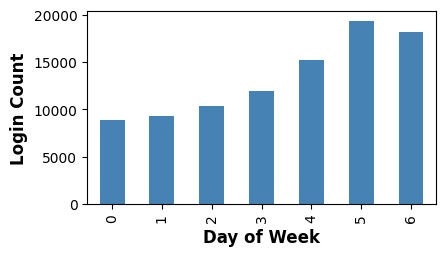

In [12]:
fig03, axes03 = plt.subplots(nrows=1,ncols=1,figsize=(4.5,2.5))

df_loginct_wd_01.loc[:,'login_ct'].plot(ax=axes03,kind='bar',color='steelblue')
axes03.set_xlabel('Day of Week', fontsize=12.0, fontweight='bold')
axes03.tick_params(axis='x', labelsize=10)
axes03.set_ylabel('Login Count', fontsize=12.0, fontweight='bold') 
axes03.tick_params(axis='y', labelsize=10) 

plt.show()

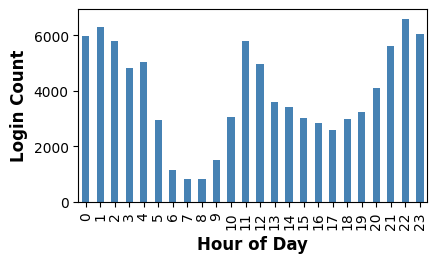

In [13]:
fig04, axes04 = plt.subplots(nrows=1,ncols=1,figsize=(4.5,2.5))

df_loginct_hr_01.loc[:,'login_ct'].plot(ax=axes04,kind='bar',color='steelblue')
axes04.set_xlabel('Hour of Day', fontsize=12.0, fontweight='bold')
axes04.tick_params(axis='x', labelsize=10)
axes04.set_ylabel('Login Count', fontsize=12.0, fontweight='bold') 
axes04.tick_params(axis='y', labelsize=10) 

plt.show()

### 2 EXPERIMENT AND METRICS DESIGN

see writeup

### 3 PREDICTIVE MODELING

user retained if they were “active” (i.e. took a trip) in the preceding 30 days

what factors are the best predictors for retention

offer suggestions to operationalize those insights to help Ultimate

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

In [14]:
#load data
filepath01 = 'ultimate_challenge/ultimate_data_challenge.json'

with open(filepath01, mode='r') as fl01:
    usr_actvty_dict_01 = json.load(fl01)
    
df_usr_actvty_01 = pd.DataFrame.from_dict(usr_actvty_dict_01)

In [15]:
colset_01 = ['phone','city','signup_date','last_trip_date',
    'avg_dist','avg_rating_by_driver','avg_rating_of_driver',
    'surge_pct','avg_surge',
    'trips_in_first_30_days','ultimate_black_user','weekday_pct']
df_usr_actvty_01 = df_usr_actvty_01.loc[:,colset_01]

#dates
df_usr_actvty_01.loc[:,'signup_date'] = pd.to_datetime(df_usr_actvty_01.loc[:,'signup_date'])
df_usr_actvty_01.loc[:,'last_trip_date'] = pd.to_datetime(df_usr_actvty_01.loc[:,'last_trip_date'])
#boolean
df_usr_actvty_01.loc[:,'ultimate_black_user'] = df_usr_actvty_01.loc[:,'ultimate_black_user'].astype(int)

In [16]:
df_usr_actvty_01.info()
df_usr_actvty_01.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   phone                   49604 non-null  object        
 1   city                    50000 non-null  object        
 2   signup_date             50000 non-null  datetime64[ns]
 3   last_trip_date          50000 non-null  datetime64[ns]
 4   avg_dist                50000 non-null  float64       
 5   avg_rating_by_driver    49799 non-null  float64       
 6   avg_rating_of_driver    41878 non-null  float64       
 7   surge_pct               50000 non-null  float64       
 8   avg_surge               50000 non-null  float64       
 9   trips_in_first_30_days  50000 non-null  int64         
 10  ultimate_black_user     50000 non-null  int64         
 11  weekday_pct             50000 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(2), ob

,phone,city,signup_date,last_trip_date,avg_dist,avg_rating_by_driver,avg_rating_of_driver,surge_pct,avg_surge,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,iPhone,King's Landing,2014-01-25,2014-06-17,3.67,5.0,4.7,15.4,1.10,4,1,46.2
1,Android,Astapor,2014-01-29,2014-05-05,8.26,5.0,5.0,0.0,1.00,0,0,50.0
2,iPhone,Astapor,2014-01-06,2014-01-07,0.77,5.0,4.3,0.0,1.00,3,0,100.0
3,iPhone,King's Landing,2014-01-10,2014-06-29,2.36,4.9,4.6,20.0,1.14,9,1,80.0
4,Android,Winterfell,2014-01-27,2014-03-15,3.13,4.9,4.4,11.8,1.19,14,0,82.4


In [17]:
#dates - ranges
sgn_up_dt_min = df_usr_actvty_01.loc[:,'signup_date'].min()
sgn_up_dt_max = df_usr_actvty_01.loc[:,'signup_date'].max()
lt_trp_dt_min = df_usr_actvty_01.loc[:,'last_trip_date'].min()
lt_trp_dt_max = df_usr_actvty_01.loc[:,'last_trip_date'].max()
lt_trp_30d_prior = lt_trp_dt_max - pd.Timedelta(days=29)

print(sgn_up_dt_min,sgn_up_dt_max,lt_trp_dt_min,lt_trp_dt_max,lt_trp_30d_prior)

2014-01-01 00:00:00 2014-01-31 00:00:00 2014-01-01 00:00:00 2014-07-01 00:00:00 2014-06-02 00:00:00


In [18]:
#retain_flg
is_lt_trp_30d = ( (df_usr_actvty_01.loc[:,'last_trip_date'] >= lt_trp_30d_prior) & 
    (df_usr_actvty_01.loc[:,'last_trip_date'] <= lt_trp_dt_max) )
df_usr_actvty_01.loc[:,'retain_flg'] = is_lt_trp_30d.astype(int)

df_usr_actvty_01.head()

,phone,city,signup_date,last_trip_date,avg_dist,avg_rating_by_driver,avg_rating_of_driver,surge_pct,avg_surge,trips_in_first_30_days,ultimate_black_user,weekday_pct,retain_flg
0,iPhone,King's Landing,2014-01-25,2014-06-17,3.67,5.0,4.7,15.4,1.10,4,1,46.2,1
1,Android,Astapor,2014-01-29,2014-05-05,8.26,5.0,5.0,0.0,1.00,0,0,50.0,0
2,iPhone,Astapor,2014-01-06,2014-01-07,0.77,5.0,4.3,0.0,1.00,3,0,100.0,0
3,iPhone,King's Landing,2014-01-10,2014-06-29,2.36,4.9,4.6,20.0,1.14,9,1,80.0,1
4,Android,Winterfell,2014-01-27,2014-03-15,3.13,4.9,4.4,11.8,1.19,14,0,82.4,0


In [19]:
#null values
df_usr_actvty_01.isna().any()

phone                      True
city                      False
signup_date               False
last_trip_date            False
avg_dist                  False
avg_rating_by_driver       True
avg_rating_of_driver       True
surge_pct                 False
avg_surge                 False
trips_in_first_30_days    False
ultimate_black_user       False
weekday_pct               False
retain_flg                False
dtype: bool

In [20]:
df_usr_actvty_01[df_usr_actvty_01.isna().any(axis=1)]

,phone,city,signup_date,last_trip_date,avg_dist,avg_rating_by_driver,avg_rating_of_driver,surge_pct,avg_surge,trips_in_first_30_days,ultimate_black_user,weekday_pct,retain_flg
6,Android,Astapor,2014-01-24,2014-01-25,3.95,4.0,NaN,0.0,1.0,1,0,100.0,0
9,Android,Winterfell,2014-01-03,2014-01-05,2.37,5.0,NaN,0.0,1.0,1,0,0.0,0
12,iPhone,Winterfell,2014-01-15,2014-03-12,20.29,5.0,NaN,0.0,1.0,1,0,100.0,0
14,Android,Astapor,2014-01-27,2014-01-28,26.01,5.0,NaN,0.0,1.0,1,0,100.0,0
15,Android,Winterfell,2014-01-15,2014-01-16,13.20,5.0,NaN,0.0,1.0,1,1,100.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49984,Android,Winterfell,2014-01-26,2014-01-26,3.50,5.0,NaN,0.0,1.0,1,0,0.0,0
49985,Android,Astapor,2014-01-26,2014-02-25,1.38,5.0,NaN,0.0,1.0,1,0,100.0,0
49989,iPhone,Winterfell,2014-01-24,2014-01-31,0.00,5.0,NaN,0.0,1.0,1,0,100.0,0
49996,iPhone,Astapor,2014-01-24,2014-01-25,0.00,4.0,NaN,0.0,1.0,1,0,0.0,0


<b>EXPLORE DATA</b>

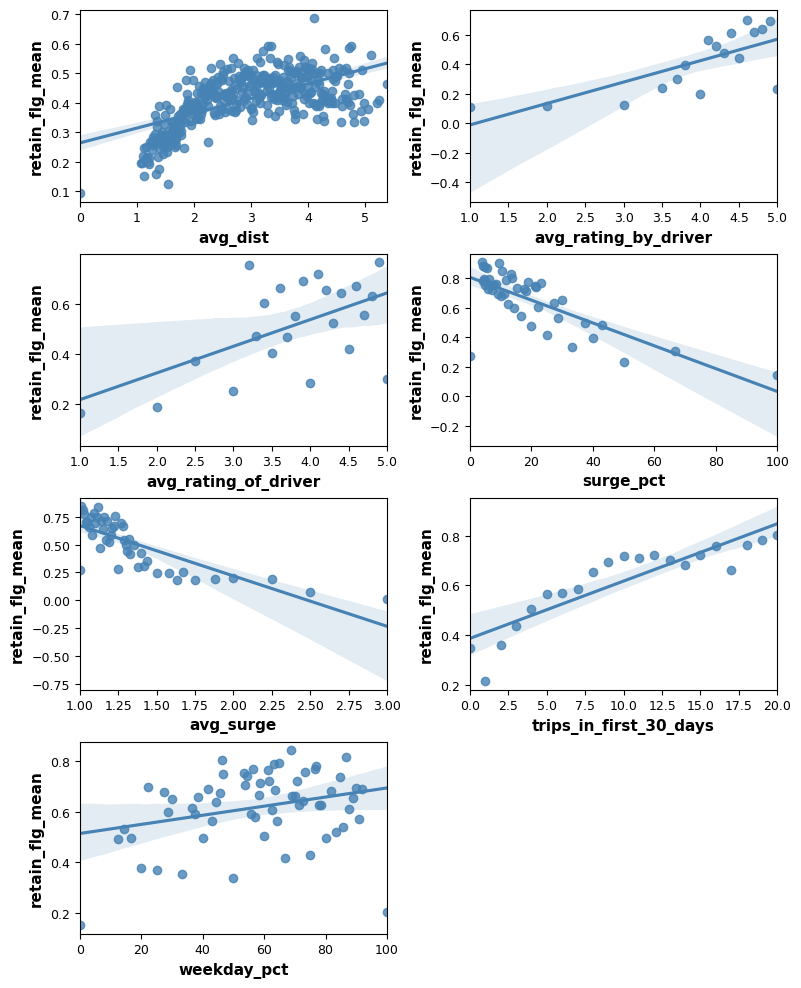

In [21]:
#numerical features
yx_num_colset_01 = [ 'avg_dist','avg_rating_by_driver','avg_rating_of_driver',
    'surge_pct','avg_surge',
    'trips_in_first_30_days','weekday_pct' ]

fig03, axes03 = plt.subplots(nrows=4,ncols=2,figsize=(9,12))
fig03.subplots_adjust(wspace=0.27, hspace=0.27)
axes03_flt = axes03.flatten()

for idx01,col01 in enumerate(yx_num_colset_01):
    
    axes03_n = axes03_flt[idx01]
    
    #x_data,y_data
    df_featval_mnct = df_usr_actvty_01.loc[:,[col01,'retain_flg']].groupby(col01).agg(['mean','std','count'])
    df_featval_mnct.columns = list(map('_'.join, df_featval_mnct.columns.values))
    df_featval_mnct.reset_index(inplace=True)
    is_sample_01 = df_featval_mnct.loc[:,'retain_flg_count'] >= 50
    
    x_data03 = df_featval_mnct.loc[is_sample_01,col01]
    y_data03 = df_featval_mnct.loc[is_sample_01,'retain_flg_mean']
    
    sns.regplot(ax=axes03_n,x=x_data03,y=y_data03,color='steelblue')
    axes03_n.set_xlabel(col01, fontsize=11.0, fontweight='bold')
    axes03_n.tick_params(axis='x', labelsize=9)
    axes03_n.set_ylabel('retain_flg_mean', fontsize=11.0, fontweight='bold')
    axes03_n.tick_params(axis='y', labelsize=9) 


axes03_flt[idx01 + 1].axis("off")
plt.show()

In [22]:
#city - means
featn_01 = 'city'
df_usr_actvty_01.loc[:,[featn_01,'retain_flg']].groupby(featn_01).agg(['mean','count'])

retain_flg       
                     mean  count
city                            
Astapor          0.243256  16534
King's Landing   0.622606  10130
Winterfell       0.342004  23336

In [23]:
#phone - handle nulls
is_phonena_01 = df_usr_actvty_01.loc[:,'phone'].isna()
df_usr_actvty_01.loc[is_phonena_01,'phone'] = 'unknown'
df_usr_actvty_01.loc[:,'phone'].value_counts()

iPhone     34582
Android    15022
unknown      396
Name: phone, dtype: int64

In [24]:
#phone - means
featn_01 = 'phone'
df_usr_actvty_01.loc[:,[featn_01,'retain_flg']].groupby(featn_01).agg(['mean','count'])

retain_flg       
              mean  count
phone                    
Android   0.195846  15022
iPhone    0.440634  34582
unknown   0.328283    396

In [25]:
#ultimate_black_user - means
featn_01 = 'ultimate_black_user'
df_usr_actvty_01.loc[:,[featn_01,'retain_flg']].groupby(featn_01).agg(['mean','count'])

retain_flg       
                          mean  count
ultimate_black_user                  
0                     0.287388  31146
1                     0.496393  18854

In [26]:
#city,phone - encode map
city_le_01 = LabelEncoder()
city_lbl_01 = city_le_01.fit_transform(df_usr_actvty_01.loc[:,'city'])
city_lblmap_01 = {idx01: lbl01 for idx01, lbl01 in enumerate(city_le_01.classes_)}
phone_le_01 = LabelEncoder()
phone_lbl_01 = phone_le_01.fit_transform(df_usr_actvty_01.loc[:,'phone'])
phone_lblmap_01 = {idx01: lbl01 for idx01, lbl01 in enumerate(phone_le_01.classes_)}

print(city_lblmap_01,'\n',phone_lblmap_01)

{0: 'Astapor', 1: "King's Landing", 2: 'Winterfell'} 
 {0: 'Android', 1: 'iPhone', 2: 'unknown'}


In [27]:
#city,phone - encode column
df_usr_actvty_01.loc[:,'city_idx'] = city_lbl_01
#df_usr_actvty_01.loc[:,['city','city_idx']].head(10)
df_usr_actvty_01.loc[:,'phone_idx'] = phone_lbl_01
#df_usr_actvty_01.loc[:,['phone','phone_idx']].head(10)

In [28]:
#city,phone - one-hot encode column to dataframe
city_ohe_01 = OneHotEncoder()
city_lbl_01 = city_ohe_01.fit_transform(df_usr_actvty_01.loc[:,['city_idx']]).toarray()
df_city_binfeat_01 = pd.DataFrame(city_lbl_01, columns=list(city_le_01.classes_))

city_colrename_01 = {'Astapor':'astapor','King\'s Landing':'kings_landing','Winterfell':'winterfell'}
df_city_binfeat_01.rename(inplace=True,columns=city_colrename_01)

#df_city_binfeat_01.head()

phone_ohe_01 = OneHotEncoder()
phone_lbl_01 = phone_ohe_01.fit_transform(df_usr_actvty_01.loc[:,['phone_idx']]).toarray()
df_phone_binfeat_01 = pd.DataFrame(phone_lbl_01, columns=list(phone_le_01.classes_))

phone_colrename_01 = {'Android':'android','iPhone':'iphone','unknown':'unknown'}
df_phone_binfeat_01.rename(inplace=True,columns=phone_colrename_01)

df_phone_binfeat_01.head()

,android,iphone,unknown
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0


In [29]:
#city - one-hot encode concat to original dataframe
df_usr_actvty_02 = pd.concat([df_usr_actvty_01,df_city_binfeat_01],axis=1)
df_usr_actvty_02 = pd.concat([df_usr_actvty_02,df_phone_binfeat_01],axis=1)
df_usr_actvty_02.head()

,phone,city,signup_date,last_trip_date,avg_dist,avg_rating_by_driver,avg_rating_of_driver,surge_pct,avg_surge,trips_in_first_30_days,...,weekday_pct,retain_flg,city_idx,phone_idx,astapor,kings_landing,winterfell,android,iphone,unknown
0,iPhone,King's Landing,2014-01-25,2014-06-17,3.67,5.0,4.7,15.4,1.10,4,...,46.2,1,1,1,0.0,1.0,0.0,0.0,1.0,0.0
1,Android,Astapor,2014-01-29,2014-05-05,8.26,5.0,5.0,0.0,1.00,0,...,50.0,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0
2,iPhone,Astapor,2014-01-06,2014-01-07,0.77,5.0,4.3,0.0,1.00,3,...,100.0,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0
3,iPhone,King's Landing,2014-01-10,2014-06-29,2.36,4.9,4.6,20.0,1.14,9,...,80.0,1,1,1,0.0,1.0,0.0,0.0,1.0,0.0
4,Android,Winterfell,2014-01-27,2014-03-15,3.13,4.9,4.4,11.8,1.19,14,...,82.4,0,2,0,0.0,0.0,1.0,1.0,0.0,0.0


In [30]:
#impute nulls
df_usr_actvty_02.loc[:,'avg_rating_by_driver'].fillna(df_usr_actvty_02.loc[:,'avg_rating_by_driver'].median(),
    inplace=True)
df_usr_actvty_02.loc[:,'avg_rating_of_driver'].fillna(df_usr_actvty_02.loc[:,'avg_rating_of_driver'].median(),
    inplace=True)

In [31]:
df_usr_actvty_02.info()
df_usr_actvty_02.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   phone                   50000 non-null  object        
 1   city                    50000 non-null  object        
 2   signup_date             50000 non-null  datetime64[ns]
 3   last_trip_date          50000 non-null  datetime64[ns]
 4   avg_dist                50000 non-null  float64       
 5   avg_rating_by_driver    50000 non-null  float64       
 6   avg_rating_of_driver    50000 non-null  float64       
 7   surge_pct               50000 non-null  float64       
 8   avg_surge               50000 non-null  float64       
 9   trips_in_first_30_days  50000 non-null  int64         
 10  ultimate_black_user     50000 non-null  int64         
 11  weekday_pct             50000 non-null  float64       
 12  retain_flg              50000 non-null  int64 

,phone,city,signup_date,last_trip_date,avg_dist,avg_rating_by_driver,avg_rating_of_driver,surge_pct,avg_surge,trips_in_first_30_days,...,weekday_pct,retain_flg,city_idx,phone_idx,astapor,kings_landing,winterfell,android,iphone,unknown
0,iPhone,King's Landing,2014-01-25,2014-06-17,3.67,5.0,4.7,15.4,1.10,4,...,46.2,1,1,1,0.0,1.0,0.0,0.0,1.0,0.0
1,Android,Astapor,2014-01-29,2014-05-05,8.26,5.0,5.0,0.0,1.00,0,...,50.0,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0
2,iPhone,Astapor,2014-01-06,2014-01-07,0.77,5.0,4.3,0.0,1.00,3,...,100.0,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0
3,iPhone,King's Landing,2014-01-10,2014-06-29,2.36,4.9,4.6,20.0,1.14,9,...,80.0,1,1,1,0.0,1.0,0.0,0.0,1.0,0.0
4,Android,Winterfell,2014-01-27,2014-03-15,3.13,4.9,4.4,11.8,1.19,14,...,82.4,0,2,0,0.0,0.0,1.0,1.0,0.0,0.0


In [32]:
#fraction of the observed users were retained
df_usr_actvty_02.loc[:,'retain_flg'].mean()

0.3662

<b>FIT LOGISTIC REGRESSION</b>

In [33]:
#data set
yx_set_03 = [ 'avg_dist','avg_rating_by_driver','avg_rating_of_driver',
    'surge_pct','avg_surge',
    'trips_in_first_30_days','ultimate_black_user',
    'android','iphone',
    'astapor','kings_landing',
    'retain_flg' ]

x_set_03 = [ 'avg_dist','avg_rating_by_driver','avg_rating_of_driver',
    'surge_pct','avg_surge',
    'trips_in_first_30_days','ultimate_black_user',
    'android','iphone',
    'astapor','kings_landing']

df_yx_usr_aty_03 = df_usr_actvty_02.loc[:,yx_set_03].copy()
df_yx_usr_aty_03.info()
df_yx_usr_aty_03.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                50000 non-null  float64
 1   avg_rating_by_driver    50000 non-null  float64
 2   avg_rating_of_driver    50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   trips_in_first_30_days  50000 non-null  int64  
 6   ultimate_black_user     50000 non-null  int64  
 7   android                 50000 non-null  float64
 8   iphone                  50000 non-null  float64
 9   astapor                 50000 non-null  float64
 10  kings_landing           50000 non-null  float64
 11  retain_flg              50000 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 4.6 MB


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,surge_pct,avg_surge,trips_in_first_30_days,ultimate_black_user,android,iphone,astapor,kings_landing,retain_flg
0,3.67,5.0,4.7,15.4,1.10,4,1,0.0,1.0,0.0,1.0,1
1,8.26,5.0,5.0,0.0,1.00,0,0,1.0,0.0,1.0,0.0,0
2,0.77,5.0,4.3,0.0,1.00,3,0,0.0,1.0,1.0,0.0,0
3,2.36,4.9,4.6,20.0,1.14,9,1,0.0,1.0,0.0,1.0,1
4,3.13,4.9,4.4,11.8,1.19,14,0,1.0,0.0,0.0,0.0,0
5,10.56,5.0,3.5,0.0,1.00,2,1,0.0,1.0,0.0,0.0,1
6,3.95,4.0,4.9,0.0,1.00,1,0,1.0,0.0,1.0,0.0,0
7,2.04,5.0,5.0,0.0,1.00,2,0,0.0,1.0,0.0,0.0,0
8,4.36,5.0,4.5,0.0,1.00,2,0,1.0,0.0,0.0,0.0,0
9,2.37,5.0,4.9,0.0,1.00,1,0,1.0,0.0,0.0,0.0,0


In [34]:
#train,test split
df_yx_usraty_trn_03, df_yx_usraty_tst_03 = train_test_split(df_yx_usr_aty_03, test_size=0.2)

In [35]:
#scalers for {y,x}, y, x on training data
scaler_yx_03 = StandardScaler()
sclprm_yx_train_03 = scaler_yx_03.fit(df_yx_usraty_trn_03)

#scale {y,x} data by training scale
yxscaled_train_03 = sclprm_yx_train_03.transform(df_yx_usraty_trn_03)
yxscaled_test_03 = sclprm_yx_train_03.transform(df_yx_usraty_tst_03)

#dataframe
df_yx_usraty_trnsc_03 = pd.DataFrame(yxscaled_train_03, index=df_yx_usraty_trn_03.index, columns=yx_set_03)
df_yx_usraty_tstsc_03 = pd.DataFrame(yxscaled_test_03, index=df_yx_usraty_tst_03.index, columns=yx_set_03)

#square values
#train
df_yx_usraty_trnsc_03.loc[:,'avg_dist2'] = df_yx_usraty_trnsc_03.loc[:,'avg_dist']**2
df_yx_usraty_trnsc_03.loc[:,'avg_rating_by_driver2'] = df_yx_usraty_trnsc_03.loc[:,'avg_rating_by_driver']**2
df_yx_usraty_trnsc_03.loc[:,'surge_pct2'] = df_yx_usraty_trnsc_03.loc[:,'surge_pct']**2
df_yx_usraty_trnsc_03.loc[:,'avg_surge2'] = df_yx_usraty_trnsc_03.loc[:,'avg_surge']**2
df_yx_usraty_trnsc_03.loc[:,'trips_in_first_30_days2'] = df_yx_usraty_trnsc_03.loc[:,'trips_in_first_30_days']**2
#test
df_yx_usraty_tstsc_03.loc[:,'avg_dist2'] = df_yx_usraty_tstsc_03.loc[:,'avg_dist']**2
df_yx_usraty_tstsc_03.loc[:,'avg_rating_by_driver2'] = df_yx_usraty_tstsc_03.loc[:,'avg_rating_by_driver']**2
df_yx_usraty_tstsc_03.loc[:,'surge_pct2'] = df_yx_usraty_tstsc_03.loc[:,'surge_pct']**2
df_yx_usraty_tstsc_03.loc[:,'avg_surge2'] = df_yx_usraty_tstsc_03.loc[:,'avg_surge']**2
df_yx_usraty_tstsc_03.loc[:,'trips_in_first_30_days2'] = df_yx_usraty_tstsc_03.loc[:,'trips_in_first_30_days']**2

#df_yx_usraty_trnsc_03.info()
#df_yx_usraty_tstsc_03.info()

In [36]:
#train x,y (y unscaled)
df_x_usraty_trnsc_03 = df_yx_usraty_trnsc_03.loc[:,x_set_03]
df_y_usraty_trn_03 = df_yx_usraty_trn_03.loc[:,['retain_flg']]
#test x,y (y unscaled)
df_x_usraty_tstsc_03 = df_yx_usraty_tstsc_03.loc[:,x_set_03]
df_y_usraty_tst_03 = df_yx_usraty_tst_03.loc[:,['retain_flg']]

#numpy arrays
#train (y unscaled)
x_usraty_trnsc_03 = df_x_usraty_trnsc_03.to_numpy()
y_usraty_trn_03 = df_y_usraty_trn_03.to_numpy()
y_usraty_trn_03 = y_usraty_trn_03.reshape((y_usraty_trn_03.shape[0],))
#test (y unscaled)
x_usraty_tstsc_03 = df_x_usraty_tstsc_03.to_numpy()
y_usraty_tst_03 = df_y_usraty_tst_03.to_numpy()
y_usraty_tst_03 = y_usraty_tst_03.reshape((y_usraty_tst_03.shape[0],))

In [37]:
df_x_usraty_trnsc_03.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,surge_pct,avg_surge,trips_in_first_30_days,ultimate_black_user,android,iphone,astapor,kings_landing
38038,-0.027517,-0.398083,0.260713,-0.381742,-0.290960,5.266637,-0.778112,-0.654732,0.667031,-0.698955,-0.503318
33783,-0.744474,0.494042,0.608691,-0.441808,-0.335912,-0.606591,-0.778112,-0.654732,0.667031,1.430707,-0.503318
24366,-0.317502,0.494042,0.608691,0.809556,0.518171,-0.339626,-0.778112,-0.654732,0.667031,1.430707,-0.503318
16174,-0.068435,0.494042,0.608691,-0.441808,-0.335912,-0.072661,-0.778112,1.527343,-1.499181,-0.698955,1.986815
47267,-0.547000,0.494042,0.608691,-0.441808,-0.335912,-0.606591,-0.778112,1.527343,-1.499181,1.430707,-0.503318


In [47]:
#gridsearch cross validation: best k linear logistic regressors
nfeat031 = len(df_x_usraty_trnsc_03.columns)

#seed
np.random.seed(dttm.datetime.now().microsecond)

#grid search, cross validation
lr_pipe031 = Pipeline( [ ('selector',SelectKBest(f_regression)), ('model',LogisticRegression()) ] )
lr_gscv031 = GridSearchCV( estimator = lr_pipe031, param_grid = {'selector__k':list(range(1,(nfeat031+1)))},
    scoring='accuracy', cv=4, verbose=False, n_jobs=4 )
lr_gscv031.fit(df_x_usraty_trnsc_03,df_y_usraty_trn_03.values.ravel())

df_lr_gscv_res031 = pd.DataFrame(lr_gscv031.cv_results_)

In [48]:
df_lr_gscv_res031.sort_values(by='rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_selector__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
5,0.222059,0.033821,0.016585,0.002983,6,{'selector__k': 6},0.7196,0.7272,0.7353,0.7274,0.727375,0.005552,1
9,0.277694,0.003660,0.023399,0.001434,10,{'selector__k': 10},0.7208,0.7256,0.7361,0.7270,0.727375,0.005537,2
10,0.325170,0.011979,0.022294,0.001728,11,{'selector__k': 11},0.7207,0.7251,0.7359,0.7272,0.727225,0.005531,3
8,0.269931,0.010397,0.022510,0.000479,9,{'selector__k': 9},0.7204,0.7252,0.7360,0.7264,0.727000,0.005660,4
4,0.244034,0.007865,0.020442,0.000377,5,{'selector__k': 5},0.7191,0.7255,0.7340,0.7278,0.726600,0.005331,5
7,0.298687,0.006600,0.023766,0.002134,8,{'selector__k': 8},0.7199,0.7246,0.7327,0.7255,0.725675,0.004580,6
6,0.261541,0.014912,0.021921,0.002416,7,{'selector__k': 7},0.7167,0.7224,0.7303,0.7216,0.722750,0.004875,7
3,0.245349,0.011134,0.019668,0.000369,4,{'selector__k': 4},0.7092,0.7161,0.7203,0.7166,0.715550,0.004009,8
2,0.230352,0.003562,0.019836,0.000687,3,{'selector__k': 3},0.6872,0.6933,0.6974,0.6902,0.692025,0.003779,9
1,0.139149,0.004116,0.020659,0.001979,2,{'selector__k': 2},0.6872,0.6933,0.6974,0.6900,0.691975,0.003804,10


In [40]:
#linear regression model: fit model with k best regressors
kbest_03 = 5

#select k best regressors
lr_sel_kbest_03 = SelectKBest(f_regression,k=kbest_03).fit(df_x_usraty_trnsc_03,df_y_usraty_trn_03.values.ravel())
lr_feat_kbest_03 = list(lr_sel_kbest_03.get_feature_names_out())

x_kbest_trnsc_03 = lr_sel_kbest_03.transform(df_x_usraty_trnsc_03)
x_kbest_tstsc_03 = np.array(df_x_usraty_tstsc_03.loc[:,lr_feat_kbest_03])
df_x_kbest_usraty_trnsc_03 = df_x_usraty_trnsc_03.loc[:,lr_feat_kbest_03]

#fit linear regression
lr_model_kbest_03 = LogisticRegression()
lr_model_kbest_res_03 = lr_model_kbest_03.fit(df_x_kbest_usraty_trnsc_03,df_y_usraty_trn_03.values.ravel())

In [41]:
list(zip(lr_feat_kbest_03,lr_model_kbest_03.coef_[0][:]))

[('trips_in_first_30_days', 0.528340370378405),
 ('ultimate_black_user', 0.39280452587113296),
 ('android', -0.24417946883913702),
 ('iphone', 0.28599773560705494),
 ('kings_landing', 0.5713197144714551)]

In [42]:
#test - accuracy
lr_model_kbest_03 = LogisticRegression()
lr_model_kbest_res_03 = lr_model_kbest_03.fit(x_kbest_trnsc_03,y_usraty_trn_03)
lr_model_kbest_03.score(x_kbest_tstsc_03,y_usraty_tst_03)

0.7187

In [43]:
#feature importance - scaled coefficients
lr_model_coef_03 = list(np.std(x_kbest_trnsc_03, 0)*lr_model_kbest_03.coef_[0][:])
df_featimp_03 = pd.DataFrame(zip(lr_feat_kbest_03,lr_model_coef_03),columns=['feat','impt'])

df_featimp_03.loc[:,'impt_abs'] = df_featimp_03.loc[:,'impt'].abs()
df_featimp_03.sort_values(by='impt_abs',ascending=False,inplace=True)

df_featimp_03

,feat,impt,impt_abs
4,kings_landing,0.571320,0.571320
0,trips_in_first_30_days,0.528340,0.528340
1,ultimate_black_user,0.392805,0.392805
3,iphone,0.285998,0.285998
2,android,-0.244179,0.244179


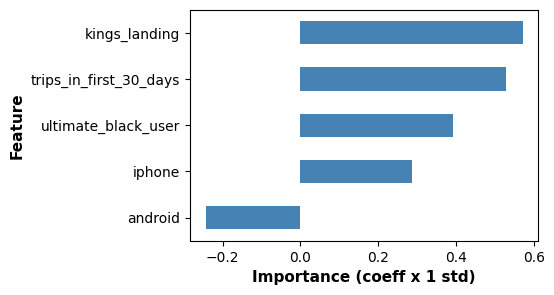

In [44]:
#feature importance - plot
df_featimp_03.sort_values(by='impt_abs',ascending=True,inplace=True)

fig04, axes04 = plt.subplots(nrows=1,ncols=1,figsize=(4.5,3))

df_featimp_03.plot.barh(ax=axes04,x='feat',y='impt',rot=0,color='steelblue')

axes04.set_xlabel('Importance (coeff x 1 std)', fontsize=11.0, fontweight='bold')
axes04.tick_params(axis='x', labelsize=10)
axes04.set_ylabel('Feature', fontsize=11.0, fontweight='bold') 
axes04.tick_params(axis='y', labelsize=10) 
axes04.get_legend().remove()

plt.show()

In [45]:
#roc, auc
y_kbest_score_03 = lr_model_kbest_03.decision_function(x_kbest_tstsc_03)
lr_fpr_03, lr_tpr_03, lr_thd_03 = roc_curve(y_usraty_tst_03.ravel(), y_kbest_score_03.ravel())

lr_roc_auc_03 = auc(lr_fpr_03, lr_tpr_03)
lr_roc_auc_03

0.7516305477307161

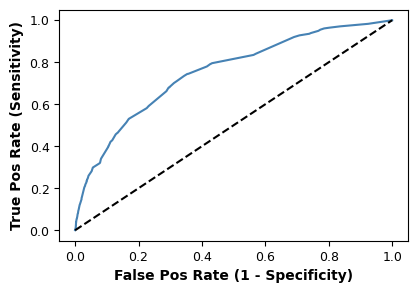

In [46]:
#roc curve
fig05, axes05 = plt.subplots(nrows=1,ncols=1,figsize=(4.5,3))

axes05 = plt.plot(lr_fpr_03,lr_tpr_03,color='steelblue')
plt.xlabel('False Pos Rate (1 - Specificity)', fontsize=10.0, fontweight='bold')
plt.tick_params(axis='x', labelsize=9)
plt.ylabel('True Pos Rate (Sensitivity)', fontsize=10.0, fontweight='bold') 
plt.tick_params(axis='y', labelsize=9) 

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.show()